
# California Housing Prices Analysis

In this project, we analyze the California housing district and price dataset to understand the factors influencing house prices. We will perform data cleaning, exploratory data analysis, feature engineering, modeling, and evaluation to build a predictive model for housing prices.


## Data Loading

In [ ]:

import pandas as pd
import numpy as np

# Load the dataset
housing = pd.read_csv('housing.csv')

# Display the first few rows of the dataset
housing.head()


## Exploratory Data Analysis (EDA)

In [ ]:

# Display the last few rows of the dataset
housing.tail()


In [6]:
housing.head(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


#### To find out how many categories exist in 'Ocean Proximity' and what these categories are

In [7]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

#### Summary of the numerical attributes

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### A distribution of each numerical attribute shown by histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023562A8FE48>,
      dtype=object)

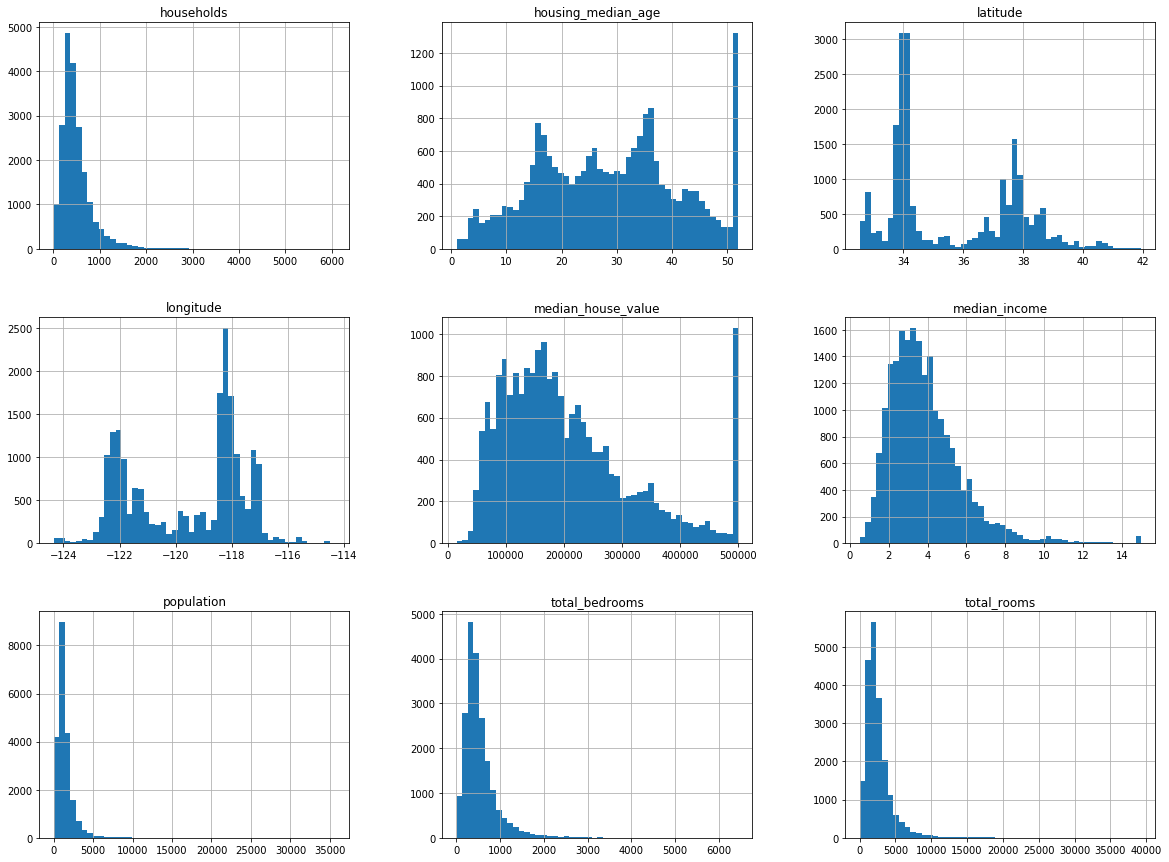

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

housing.hist(bins = 50, figsize = (20,15))

#### Creating a test set

In [10]:
def split_train_set(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return (data.iloc[train_indices], data.iloc[test_indices])

In [11]:
train_set, test_set = split_train_set(housing, 0.2)
print ('train_set length: ', len(train_set))
print ('test_set length: ', len(test_set))

train_set length:  16512
test_set length:  4128


The problem with this method listed above is that if the data is uodated, the exact test set is not retained.
This method below uses a unique identifier to separate the data. That is if the dataset has a unique identifier. This one does not have an identifier column.

In [12]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

Using the row index as ID.
However, using this method one has to ensure additional data are appended beneath the initial dataset.

In [13]:
housing_with_id = housing.reset_index() #Adds index column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'index')

The longitude and latitude can be used as indentifier since they are almost unchangeable

In [14]:
housing_with_id['id'] = housing['longitude'] * 1000 + housing['latitude']
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'id')

Using Scikitlearn function

In [15]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

#### Stratified Sampling

The following code creates an income category attribute by dividing the median income by
1.5 (to limit the number of income categories), and rounding up using ceil (to have
discrete categories), and then keeping only the categories lower than 5 and merging
the other categories into category 5:

In [16]:
housing['income_cat'] = np.ceil(housing['median_income']/1.5)
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace = True)

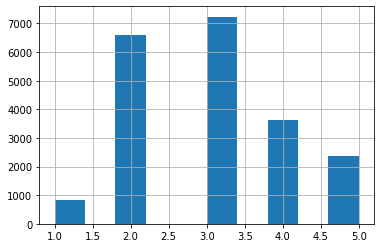

In [17]:
housing['income_cat'].hist()

To do stratified sampling based on the income category. For this 
we can use Scikit-Learn’s StratifiedShuffleSplit class

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [19]:
print (strat_test_set['income_cat'].value_counts()/ len(strat_test_set))

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114341
1.0    0.039971
Name: income_cat, dtype: float64


In [20]:
print(strat_test_set['income_cat'].value_counts()/len(strat_train_set))

3.0    0.087633
2.0    0.079700
4.0    0.044089
5.0    0.028585
1.0    0.009993
Name: income_cat, dtype: float64


Removing the income_cat attribute so the data is back to its original state

In [21]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1,inplace=True )

#### DIscovering and Visualiszing the Data

In [22]:
housing = strat_train_set.copy()

 Visualizing Geographic data

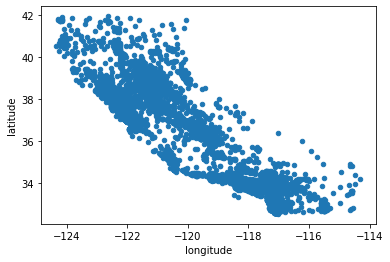

In [23]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude')

Setting the alpha option to 0.1 makes it much easier to visualize the places 
where there is a high density of data points

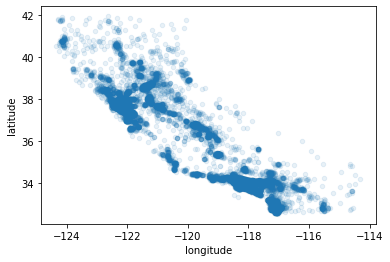

In [24]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = '0.1')

Considering Housing prices

The radius of each circle represents
the district’s population (option s), and the color represents the price (option c). We
will use a predefined color map (option cmap) called jet, which ranges from blue
(low values) to red (high prices)

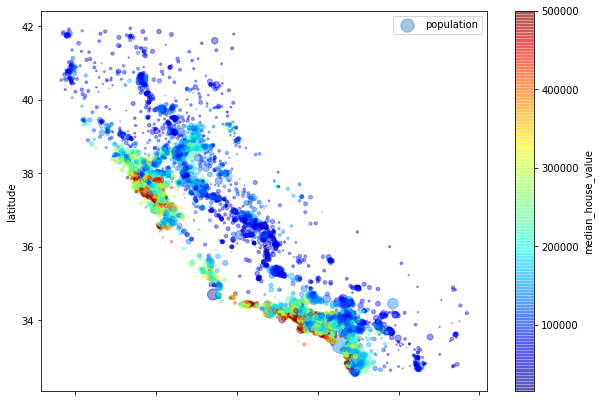

In [25]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.4,
            s = housing['population']/100, label = 'population', figsize = (10,7),
            c = 'median_house_value', cmap = plt.get_cmap('jet'), colorbar = True
            )

plt.legend()

#### Correlations

The corr()method will be used to compute the standard correlation co-efficient( called Pearson's r)

In [26]:
corr_matrix = housing.corr()

In [27]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

Using Pandas scatter_matrix function to check for correlation of some attributes

In [28]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002356636EE48>,
      dtype=object)

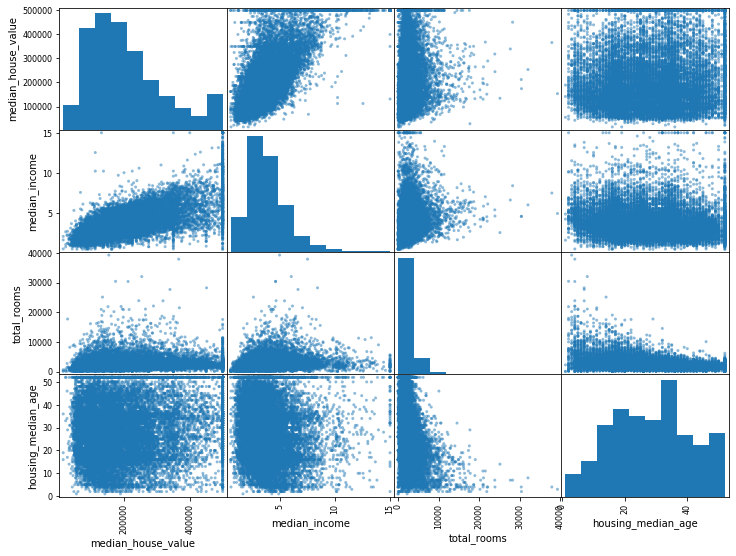

In [29]:
attributes = ['median_house_value','median_income','total_rooms', 'housing_median_age']

scatter_matrix(housing[attributes], figsize = (12, 9))

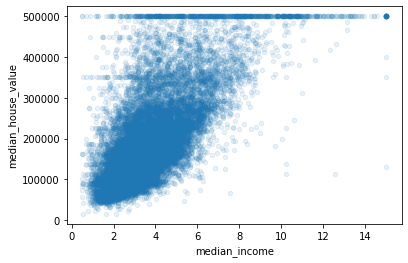

In [30]:
housing.plot(kind = 'scatter', x ='median_income', y = 'median_house_value', alpha = 0.1)

#### Other attributes combination

Experimenting with other attributes combination to gain more insights

In [31]:
#rooms per household

housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [32]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,207005.322372,5.440406,0.212873,3.096469
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,115701.297250,2.611696,0.057378,11.584825
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950,119800.000000,4.442168,0.175304,2.431352
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,179500.000000,5.232342,0.203027,2.817661
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,263900.000000,6.056361,0.239816,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


Investigating the correlation

In [33]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

#### Preparing Data for ML algorithms

reverting to a clean training set (by copying strat_train_set once again),
and let’s separate the predictors and the labels since we don’t necessarily want to apply
the same transformations to the predictors and the target values (note that drop()
creates a copy of the data and does not affect strat_train_set).

In [34]:
housing = strat_train_set.drop('median_house_value', axis = 1)
housing_labels = strat_train_set['median_house_value'].copy()

Data Cleaning

In [35]:
housing.dropna(subset = ['total_bedrooms'])
housing.drop('total_bedrooms', axis = 1)
median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median, inplace = True)

Scikit-Learn provides a handy class to take care of missing values: SimpleImputer.

In [36]:
from sklearn.impute import SimpleImputer

In [37]:
imputer = SimpleImputer(strategy = 'median')

Median can only be computed on numerical attributes, we need to create a
copy of the data without the text attribute ocean_proximity:

In [38]:
housing_num = housing.drop('ocean_proximity', axis = 1)

In [39]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [40]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [41]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

Replaciing missing values by learned median

In [42]:
X = imputer.transform(housing_num)

Returning the data to a pandas dataframe

In [43]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns)

In [44]:
X

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [45]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [46]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.0 MB


In [47]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [48]:
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.1 MB


#### Text and Categorical attributes

In [49]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


Converting this labels to numbers for ease in ML processsing.

Using Scikitlearn OrdinalEncoder class

In [50]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

In [51]:
housing_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 1 columns):
ocean_proximity    16512 non-null object
dtypes: object(1)
memory usage: 258.0+ KB


In [52]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

Getting the list of categories

In [53]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [54]:
from sklearn.preprocessing import OneHotEncoder

In [55]:
catEncoder = OneHotEncoder()
housing_cat_1hot = catEncoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

converting to a dense numpy array

In [56]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

to get the list of categories

In [57]:
catEncoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

#### Custom Transformers

In [58]:
from sklearn.base import TransformerMixin, BaseEstimator

rooms_ix, bedroom_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y = None):
        return self #nothing else to do 
    def transform(self, X, y = None):
        rooms_per_households = X[:, rooms_ix]/ X[:, households_ix]
        population_per_household = X[:, population_ix]/X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedroom_ix] / X[:,rooms_ix]
            return np.c_[X, rooms_per_households, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_households, population_per_household]
        

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)

housing_attrib_extra = attr_adder.transform(housing.values)        
        
            

#### Transformation Pipelines

there are many data transformation steps that need to be executed in
the right order. Fortunately, Scikit-Learn provides the Pipeline class to help with
such sequences of transformations. Here is a small pipeline for the numerical
attributes:

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [60]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())

])

housing_num_tr = num_pipeline.fit_transform(housing_num)

A single transformer that handles both numerical and catgorical columns without having to separate them is the ScikitLearn 
##### 'ColumnTransformer' 

In [61]:
from sklearn.compose import ColumnTransformer

In [62]:
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),    
])

housing_prepared = full_pipeline.fit_transform(housing)

### Selecting and Training a model

#### Linear Regression Model

In [63]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

Trying the linear regression on a few instances of the dataset

In [64]:
few_data = housing.iloc[:5]
few_data_labels = housing_labels.iloc[:5]
few_data_prep = full_pipeline.transform(few_data)

print ('Predictions: ', lin_reg.predict(few_data_prep))
print ('labels: ', list(few_data_labels))

Predictions:  [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
labels:  [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


measuring the regression model’s RMSE on the whole training
set using Scikit-Learn’s mean_squared_error function

In [65]:
from sklearn.metrics import mean_squared_error

housing_predict = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predict)
lin_rmse = np.sqrt(lin_mse)

lin_rmse

68627.87390018745

most districts’
median_housing_values range between 120,000  and  265,000, so a typical prediction
error of $68,627 is not very satisfying. This is an example of a model underfitting
the training data.

We try a more powerful model

#### DecisionTreeRegressor.

This is a powerful model, capable of finding
complex nonlinear relationships in the data

In [66]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
housing_tree_fit = tree_reg.fit(housing_prepared, housing_labels)

Evaluating the model on the training dataset

In [67]:
housing_tree_predict = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_tree_predict)
tree_rmse = np.sqrt(tree_mse)

tree_rmse

0.0

A rmse of 0.0 which suggest the model has absolutely no prediction error is fishy. More likely the model has overfit the data. model validation is needed to further probe the model

#### Cross validation for model evaluation

Scikit-Learn’s K-fold cross-validation feature. 
The following
code randomly splits the training set into 10 distinct subsets called folds, then it
trains and evaluates the Decision Tree model 10 times, picking a different fold for
evaluation every time and training on the other 9 folds. The result is an array containing
the 10 evaluation scores:

In [68]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring = 'neg_mean_squared_error', cv = 10)
tree_rmse_scores = np.sqrt(-scores)

In [69]:
def display_scores(scores):
    
    print ('Scores: ', scores)
    print ('Mean: ', scores.mean())
    print ('Standard deviation: ', scores.std())
    
display_scores(tree_rmse_scores)

Scores:  [72909.75537175 70824.63115419 68378.20577226 72238.32902061
 70188.51137421 78044.08199938 71821.76360013 74015.01203773
 68017.5535101  69717.79869006]
Mean:  71615.56425304251
Standard deviation:  2808.526576726803


Performimg Cross validation on the linear regression model

In [70]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring = 'neg_mean_squared_error', cv = 10)
lin_rmse_scores = np.sqrt(-lin_scores)

In [71]:
display_scores(lin_rmse_scores)

Scores:  [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean:  69104.07998247063
Standard deviation:  2880.3282098180575


Indeed the Decision Tree Model performs worse than the linear Model

Trying out another model: 
    
#### Random Forests
    
Random Forests work by training many Decision Trees on random subsets of
the features, then averaging out their predictions

In [72]:
from sklearn.ensemble import RandomForestRegressor

In [73]:
forest_reg = RandomForestRegressor()

housing_forest_fit = forest_reg.fit(housing_prepared, housing_labels)

housing_forest_predict = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_forest_predict)
forest_rmse = np.sqrt(forest_mse)



cross-validation

In [74]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, 
                                scoring = 'neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)


In [75]:
forest_rmse

18586.392721339795

In [76]:
display_scores(forest_rmse_scores)

Scores:  [51413.45140677 48922.57331781 46551.52670739 51872.3056662
 47354.75855197 51953.78002459 52324.91283842 49587.86303663
 48766.83080954 53678.24244062]
Mean:  50242.624479993094
Standard deviation:  2222.7760188405778


Random Forests look very promising. However, note that
the score on the training set is still much lower than on the validation sets, meaning
that the model is still overfitting the training set. Possible solutions for overfitting are
to simplify the model, constrain it (i.e., regularize it), or get a lot more training data.

##### Saving the models

In [77]:
import joblib

In [78]:
joblib.dump(housing_forest_predict, 'forest_model.pkl')

['forest_model.pkl']

In [79]:
forest_model_loaded = joblib.load('forest_model.pkl')

#### Fine tuning the model

Using GridSearchCV

In [80]:
from sklearn.model_selection import GridSearchCV

The following code searches for the best combination
of hyperparameter values for the RandomForestRegressor

In [81]:
param_grid = [
    {'n_estimators' : [3, 10, 30], 'max_features' : [2, 4, 6, 8] },
    {'bootstrap' : [False], 'n_estimators' : [3, 10], 'max_features' : [2, 3, 4]}
]

forest_reg = RandomForestRegressor()

gridsearch = GridSearchCV(forest_reg, param_grid, cv=5, 
                         scoring = 'neg_mean_squared_error', return_train_score = True)

gridsearch.fit(housing_prepared, housing_labels)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

To get the best combination of parameters

In [82]:
gridsearch.best_params_

{'max_features': 6, 'n_estimators': 30}

To obtain the best estimator directly

In [83]:
gridsearch.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

Displaying the Evaluation results

In [84]:
cvres = gridsearch.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print (np.sqrt(-mean_score), params)

63011.424427146325 {'max_features': 2, 'n_estimators': 3}
55282.46996497225 {'max_features': 2, 'n_estimators': 10}
52660.50103497852 {'max_features': 2, 'n_estimators': 30}
60843.40537103307 {'max_features': 4, 'n_estimators': 3}
52819.54404747241 {'max_features': 4, 'n_estimators': 10}
50399.10790789263 {'max_features': 4, 'n_estimators': 30}
58375.47881885887 {'max_features': 6, 'n_estimators': 3}
52479.488345056016 {'max_features': 6, 'n_estimators': 10}
49881.8151180755 {'max_features': 6, 'n_estimators': 30}
59072.49950024181 {'max_features': 8, 'n_estimators': 3}
51761.51631010355 {'max_features': 8, 'n_estimators': 10}
49899.652258568676 {'max_features': 8, 'n_estimators': 30}
61435.83197159353 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54352.459231531255 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59180.96429155919 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52466.102526368806 {'bootstrap': False, 'max_features': 3, 'n_estimators'

#### Inspecting the models

RandomForestRegressor can indicate the relative importance of each
attribute for making accurate predictions:

In [87]:
feature_importance = gridsearch.best_estimator_.feature_importances_
feature_importance

array([7.80858307e-02, 7.16161378e-02, 4.48953783e-02, 1.77645054e-02,
       1.62508733e-02, 1.79310652e-02, 1.60039055e-02, 3.09712396e-01,
       6.31001983e-02, 1.09913690e-01, 1.02399292e-01, 1.21852097e-02,
       1.31865359e-01, 4.89355446e-05, 2.10802602e-03, 6.11919647e-03])

Displaying the importance scores next to their corresponding attribute names

In [88]:
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attibutes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importance, attibutes),reverse = True)

[(0.309712395721981, 'median_income'),
 (0.13186535947941383, 'INLAND'),
 (0.10991369013311188, 'pop_per_hhold'),
 (0.10239929242708826, 'bedrooms_per_room'),
 (0.0780858307168228, 'longitude'),
 (0.07161613777884962, 'latitude'),
 (0.06310019832851997, 'rooms_per_hhold'),
 (0.04489537833173867, 'housing_median_age'),
 (0.017931065211064412, 'population'),
 (0.017764505354163126, 'total_rooms'),
 (0.016250873313719518, 'total_bedrooms'),
 (0.01600390551823323, 'households'),
 (0.012185209653846093, '<1H OCEAN'),
 (0.006119196469942766, 'NEAR OCEAN'),
 (0.002108026016871362, 'NEAR BAY'),
 (4.89355446335614e-05, 'ISLAND')]

#### Evaluating the system on a Test set

In [92]:
final_model = gridsearch.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis = 1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_prediction = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_prediction)
final_rmse = np.sqrt(final_mse)

In [93]:
final_rmse

48100.126046071695

Computing 95% confidence interval for the generalisation. Using scipy.stats.t.interval():

In [96]:
from scipy import stats
confidence = 0.95
squared_error = (y_test - final_prediction)**2

np.sqrt(stats.t.interval(confidence, (len(squared_error) - 1), loc = squared_error.mean(),
                              scale = stats.sem(squared_error)))

array([46103.02602734, 50017.54934439])